In [ ]:
import cv2
import glob
from mytool import imagetools as tools

In [ ]:
pathlist = glob.glob('./data/*')
pathlist

['./data/140.jpg', './data/102.jpg', './data/253.jpg']

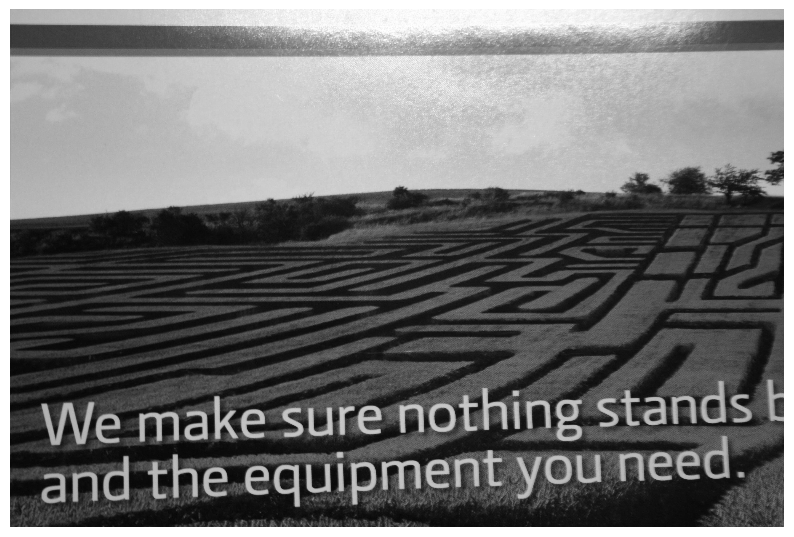

In [ ]:
testimage = cv2.imread(pathlist[0])
resizedimage = cv2.resize(testimage, (testimage.shape[1]//5, testimage.shape[0]//5))
grayimage = cv2.cvtColor(resizedimage, cv2.COLOR_RGB2GRAY)
# print(grayimage.shape)

# cv2.imshow('testimage(gray)', resizedimage)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
tools.display(grayimage)

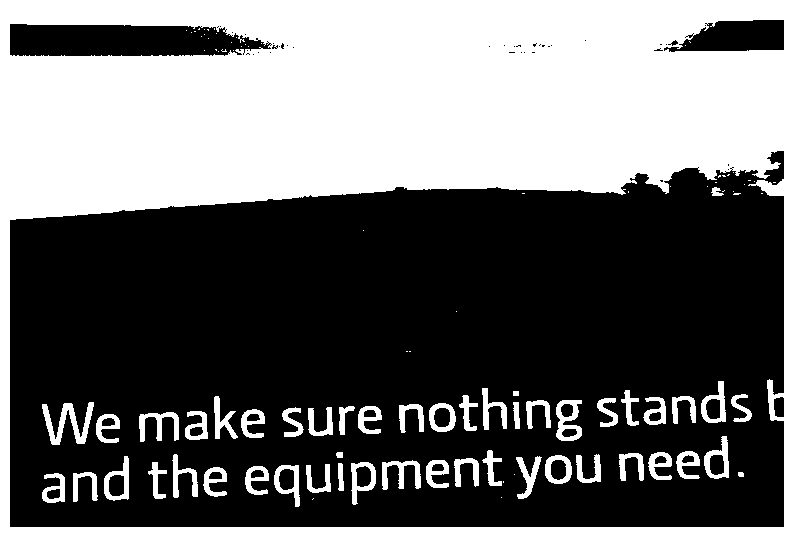

In [ ]:
retval, thresh1 = cv2.threshold(resizedimage, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
tools.display(thresh1)
# cv2.imshow('binary image', thresh1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

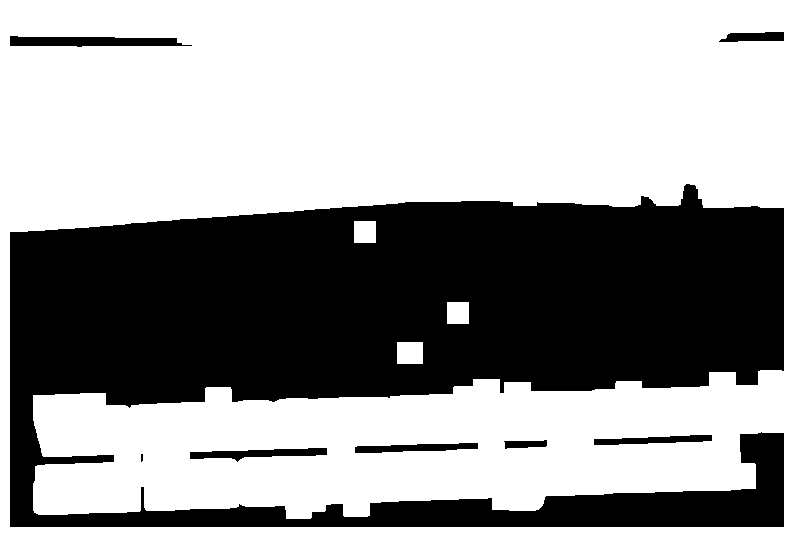

In [ ]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,8))
dilation = cv2.dilate(thresh1, rect_kernel, iterations=3)
tools.display(dilation)

In [ ]:
# Topological structural analysis of digitized binary images by border following
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [-1,  3, -1, -1]]], dtype=int32)

23 361 751 149
387 333 26 22
437 293 22 22
344 212 22 22
0 0 774 223


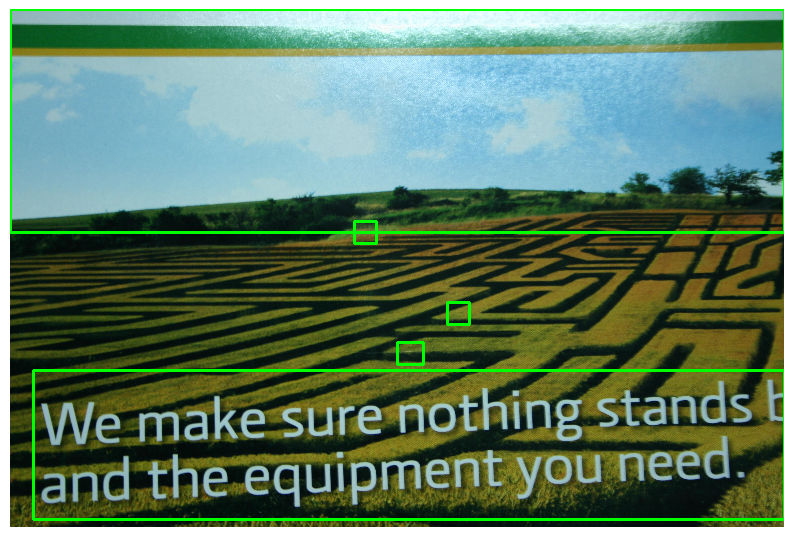

In [ ]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    print(x,y,w,h)

    # Draw the bounding box on the text area
    rect=cv2.rectangle(resizedimage, (x, y), (x + w, y + h), (0, 255, 0), 2)

tools.display(rect)